# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

## 1.  Optimal foraging of individual agent

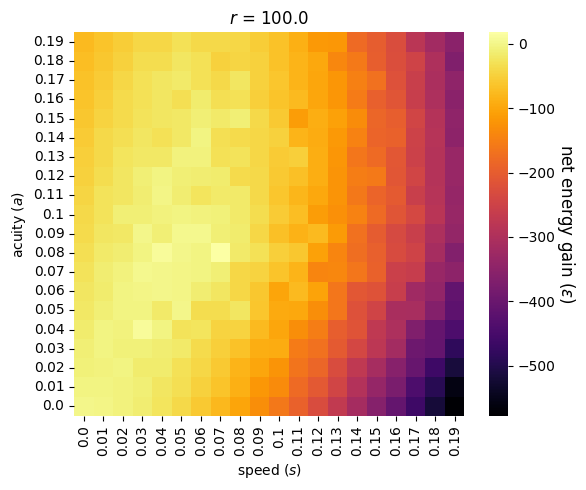

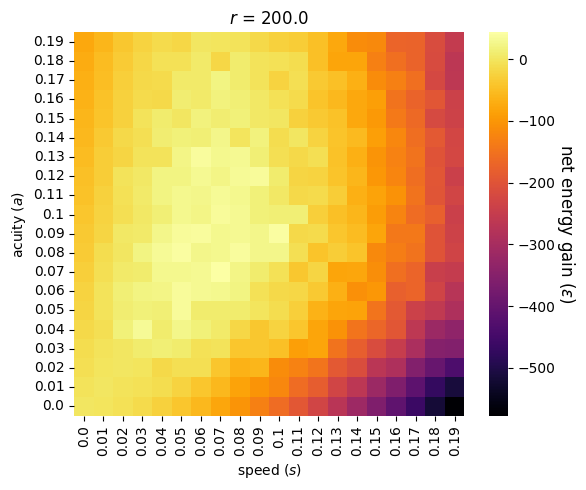

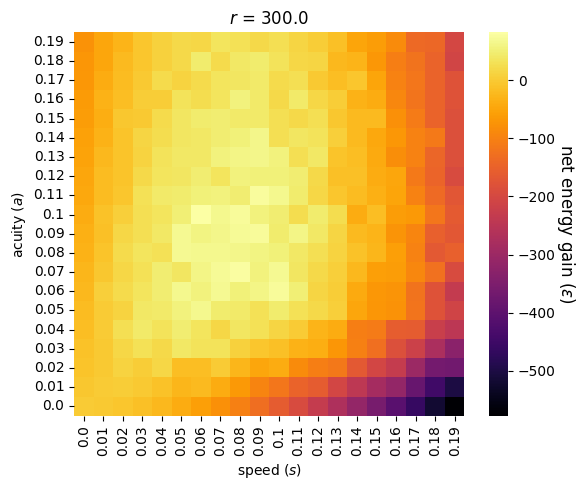

In [52]:
# Parameters
F = 1       # resource energy
c_s = 160
c_a = 4
generation = 1000

# Load agent-level data
df = pd.read_csv("./simulation_results/3_1Rate100_200_300.csv", delimiter=",")
df = df.apply(pd.to_numeric, errors="coerce")
#df["energy"] = df["energy"] / generation

# Get sorted unique values of 'Rate'
r_values = sorted(df["Rate"].unique())

# Loop over each Rate value and create an independent figure
for r_value in r_values:
    # Filter data for current Rate value
    subset = df[df["Rate"] == r_value]

    # Create pivot table for heatmap
    pivot_table = subset.pivot_table(
        index='acuity',
        columns='speed',
        values='energy'
    )

    # Create a new figure for each plot
    plt.figure(figsize=(6, 5))

    # Create the heatmap
    heatmap = sns.heatmap(
        pivot_table,
        cmap="inferno",
        cbar=True
    )

    # Add colorbar label
    cbar = heatmap.collections[0].colorbar
    cbar.set_label(r"net energy gain ($\varepsilon$)", rotation=-90, labelpad=15, fontsize=12)

    # Add title and axis labels
    plt.title(fr"$r$ = {r_value}")
    plt.xlabel(r"speed ($s$)")
    plt.ylabel(r"acuity ($a$)")

    # Flip y-axis so that higher speed is at the top
    plt.gca().invert_yaxis()

    # Display the figure
    plt.tight_layout()
    plt.show()


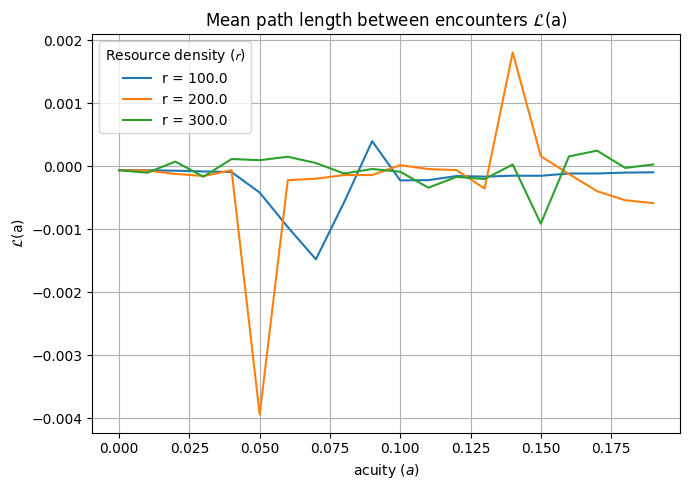

In [49]:
df["C"] = c_s * df["speed"]**2 + c_a * df["acuity"]
df["mu"] = (df["energy"] + df["C"]) / df["speed"]
# Compute mean path length between encounters
df["L"] = df["speed"] / df["mu"]

# Plot 𝓛(a) vs. acuity for each resource density r
plt.figure(figsize=(7, 5))

# Loop over each Rate
for r_value in sorted(df["Rate"].unique()):
    subset = df[df["Rate"] == r_value]

    # Group by acuity and calculate mean L (if needed)
    grouped = subset.groupby("acuity")["L"].mean().reset_index()

    # Plot line
    plt.plot(grouped["acuity"], grouped["L"], label=f"r = {r_value}")

# Labels and title
plt.xlabel(r"acuity ($a$)")
plt.ylabel(r"$\mathcal{L}($a$)$")
plt.title(r"Mean path length between encounters $\mathcal{L}($a$)$")
plt.legend(title=r"Resource density ($\mathcal{r}$)")
plt.grid(True)
plt.tight_layout()
plt.show()



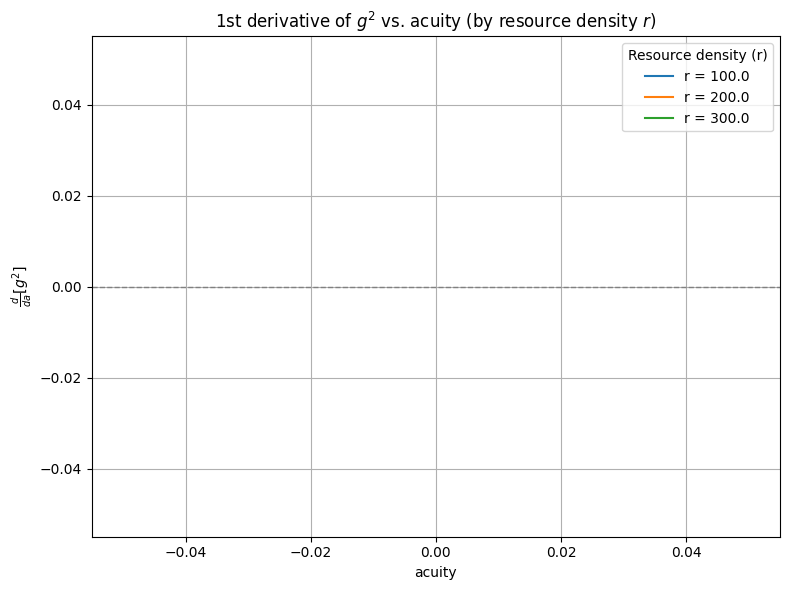

In [33]:
df = df.dropna(subset=["L"])
plt.figure(figsize=(8, 6))

# Loop through each resource density r
for r_value in sorted(df["Rate"].unique()):
    # Filter and sort by acuity
    group = df[df["Rate"] == r_value].sort_values("acuity")

    a = group["acuity"].values
    L = group["L"].values
    
    # Avoid division by zero or invalid values
    with np.errstate(divide='ignore', invalid='ignore'):
        g = 1 / L
        g2 = g**2
        dg2_da = np.gradient(g2, a)

    # Plot the derivative curve for this r
    plt.plot(a, dg2_da, label=f"r = {r_value}")

# Add horizontal dashed line at y=0 (without duplicate label)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and layout
plt.xlabel("acuity")
plt.ylabel(r"$\frac{d}{da}[g^2]$")
plt.title("1st derivative of $g^2$ vs. acuity (by resource density $r$)")
plt.grid(True)
plt.legend(title="Resource density (r)")
plt.tight_layout()
plt.show()


In [36]:
g2

array([2.07360000e+04, 2.07360000e+04, 2.07360000e+04, 2.07360000e+04,
       2.07360000e+04, 2.07360000e+04, 2.07360000e+04, 2.07360000e+04,
       2.07360000e+04, 2.07360000e+04, 2.07360000e+04, 2.07360000e+04,
       2.07360000e+04, 2.07360000e+04, 2.07360000e+04, 2.07360000e+04,
       2.07360000e+04, 2.07360000e+04, 2.07360000e+04, 2.23058892e+04,
       2.29943526e+04, 2.23685599e+04, 2.22208711e+04, 2.25817309e+04,
                  inf, 2.17435050e+04, 2.19285882e+04, 2.16717546e+04,
       3.18176406e+04, 4.11639012e+04, 7.10222500e+04, 3.29476000e+05,
       2.43457510e+04, 2.55738842e+04, 2.71700278e+04, 2.74233600e+04,
       2.31648400e+04, 2.28084882e+04, 2.34127779e+04, 2.49527823e+04,
       2.68960000e+04, 2.68632100e+04, 2.54521150e+04, 2.50386669e+04,
       3.44473600e+04, 3.14471111e+04, 3.11342424e+04, 2.83501406e+04,
       2.32177452e+04, 2.28681605e+04, 2.30888446e+04, 4.85100625e+04,
       8.91136000e+05, 2.42056444e+04, 2.38393600e+04, 2.37641494e+04,
      

In [25]:
df["L"]

0            NaN
1       0.006944
2       0.006944
3       0.006944
4       0.006944
          ...   
1195    0.005234
1196    0.005366
1197    0.005509
1198    0.005584
1199    0.005701
Name: L, Length: 1200, dtype: float64

In [22]:
print(L)

[0.00694444 0.00694444 0.00694444 0.00694444 0.00694444 0.00694444
 0.00694444        nan 0.00694444 0.00694444 0.00694444 0.00694444
 0.00694444 0.00694444 0.00694444 0.00694444 0.00694444 0.00694444
 0.00694444 0.00694444 0.00662143 0.0065703  0.00653542 0.00640897
 0.00659461 0.00665459 0.00668623 0.00670841 0.         0.00174216
 0.00375235 0.00492881 0.00679286 0.00678165 0.00675297 0.00669561
 0.00560617 0.00603865 0.00606673 0.00625319 0.00593912 0.00609756
 0.00610128 0.00626813 0.0045403  0.00538793 0.0056391  0.00566736
 0.00648692 0.00656281 0.00661278 0.00658111 0.00631967 0.00633054
 0.00642749 0.00647668 0.         0.00105932 0.00258732 0.00393701
 0.0040568  0.00446429 0.00494234 0.00523169 0.00648534 0.00644315
 0.00638448 0.00635015 0.00555266 0.00574713 0.00585823 0.00597708
 0.00603622 0.00613965 0.00621551 0.00626392 0.         0.00074963
 0.00200401 0.00307587 0.0061627  0.00613958 0.00598315 0.00591716
 0.0057663  0.00563698 0.00545308 0.00524332 0.00510098 0.0046

## 2. Steady-state of a population using single strategy